In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import glob

In [2]:
results = [pd.read_csv(path) for path in glob.glob("../logs/*csv")]
results = pd.concat(results)
# Clean dataframe
results = results.apply(lambda x: x.apply(lambda y: y.split(' ')[1][:-1]))
results

,eeg_feature,model,hidden_channels,window_size,batch_size,learning_rate,dropout_rate,weight_decay,activation_funct,number_train_samples,...,val_f1,val_prec,val_reca,val_roc,pytorch_total_params,train_time,best_epoch,experiment_id,train_samples,val_samples
0,'wav','MLP',256,2.0,32,0.0005,0.25,0.0,'relu',2,...,0.9886212524465587,0.9898202470911872,0.98875,0.9999134072580644,41248,2000.7293481826782,599,'326','12,'22
1,'wav','MLP',256,2.0,32,0.0005,0.25,0.0,'relu',2,...,0.9906245125820113,0.9910835093068848,0.9906250000000001,0.9999359879032257,41248,2142.8056061267853,735,'1466','97,'52
2,'wav','MLP',256,2.0,32,0.0005,0.25,0.0,'relu',2,...,0.9823312199172278,0.9868760387797888,0.983125,0.9999946572580645,41248,3337.6750404834747,945,'2606','101,'11
3,'wav','MLP',256,2.0,32,0.0005,0.25,0.0,'relu',2,...,0.9924616192644403,0.9928560471732948,0.9925,0.999908870967742,41248,2653.7170102596283,925,'3746','5,'40
4,'wav','MLP',256,2.0,32,0.0005,0.25,0.0,'relu',2,...,0.9843726475297668,0.9868600780339203,0.985,0.9999833669354838,41248,2433.5561838150024,824,'4886','48,'40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,'wav','GraphConv',2048,2.0,32,0.0005,0.25,0.0,'relu',8,...,0.9827370966696336,0.982971402779677,0.9828125,0.999893245967742,329796,1861.271414756775,501,'6079','72,'101
6,'wav','GraphConv',2048,2.0,32,0.0005,0.25,0.0,'relu',8,...,0.9956257818003029,0.9956988325594605,0.995625,0.9999852822580645,329796,850.090039730072,206,'7219','59,'34
7,'wav','GraphConv',2048,2.0,32,0.0005,0.25,0.0,'relu',8,...,0.9956121781738663,0.995652035566702,0.995625,0.9999960685483871,329796,1379.2792975902557,295,'8359','28,'34
8,'wav','GraphConv',2048,2.0,32,0.0005,0.25,0.0,'relu',8,...,0.991193773041873,0.9914193086620109,0.99125,0.9999605846774193,329796,896.0295360088348,214,'9499','24,'8


## MLP

Number of trainable parameters depends on:

wav-psd:
    hidden channels
    
raw:
    hidden channels, in_channels -> window_size

In [25]:
model = 'MLP'
ef='wav'
wav_psd_params = results[(results['model'] == f'\'{model}\'') & (results['eeg_feature'] == f'\'{ef}\'')]['pytorch_total_params'].unique().astype(int)
ef= 'raw'
raw_params = results[(results['model'] == f'\'{model}\'') & (results['eeg_feature'] == f'\'{ef}\'')]['pytorch_total_params'].unique().astype(int)

In [26]:
wav_psd_params.sort(), raw_params.sort()

(None, None)

In [27]:
wav_psd_params, raw_params

(array([ 10336,  20640,  41248,  82464, 164896, 329760]),
 array([   67680,   133216,   135328,   264288,   266400,   270624,
          395360,   526432,   528544,   532768,   541216,   790688,
         1052832,  1057056,  1065504,  1082400,  1581344,  2105632,
         2114080,  2130976,  2164768,  3162656,  4211232,  4228128,
         4261920,  6325280,  8422432,  8456224, 12650528, 16844832]))

133216
135328
1057056
1065504
4228128
16844832


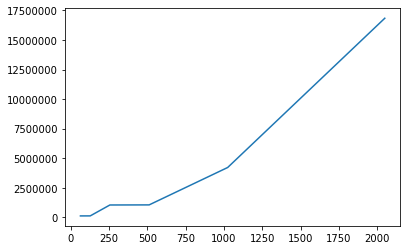

In [54]:
models = ['LR','MLP','CNN','GraphConv']
hidden_channels = [64, 128, 256, 512, 1024, 2048]
efs = ['psd','raw'] # PSD and WAV have the same number of input features

model = models[1]
ef = efs[1]

vals = []
for hc in hidden_channels:
    if model == 'LR':
        hc = 0
    res = results[(results['model'] == f'\'{model}\'') & (results['eeg_feature'] == f'\'{ef}\'') & (results['hidden_channels'].astype(int)==hc)]['pytorch_total_params'].unique().astype(int)
    val = res[0]
    print(val)
#     plt.plot(hc,,'x')
    vals.append(val)
plt.plot(hidden_channels,vals)
plt.ticklabel_format(style='plain') 
plt.show()